## Reference : Computational Optimal Transport by Gabriel Peyré, Marco Cuturi

In [142]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Given histogram a and b from random data

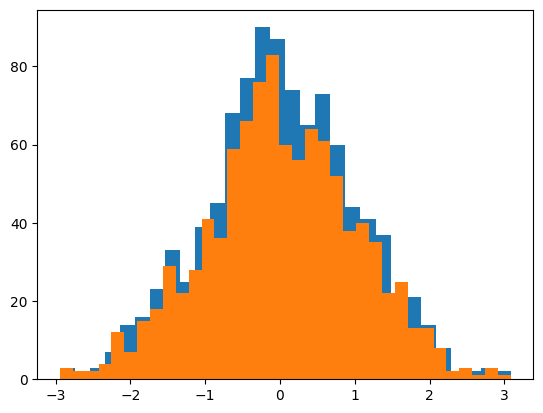

In [143]:
random.seed(42)
data1 = np.random.randn(1000) 
hist1 = plt.hist(data1,bins=30)
a = hist1[0]/sum(hist1[0])
a = np.array(a[a > 0])
data2 = np.random.randn(1000) 
hist2 = plt.hist(data1,bins=35)
b = hist2[0]/sum(hist2[0])
b = np.array(b[b>0])
n,m = len(a), len(b)

Let's use the cost function of squared sum

In [153]:
def cost(a,b):
    n,m = len(a), len(b)
    C = np.zeros((n, m))

    for i in range(n):
        for j in range(m):
            C[i, j] = np.sum((a[i] - b[j])**2 / (a[i] + b[j]))
    return C

In [154]:
def H(P):
    entropy = -np.sum(P*(np.log(P)-1))
    return entropy

def Lc(a,b,P,e):
    return np.sum(P*cost(a,b)) - e*H(P)
    

# Sinkhorn Algorithm

In [163]:
e = 0.1
iteration = 1000
u, v = np.zeros((iteration+1,n)),np.zeros((iteration+1,m))
P = np.zeros((iteration+1,n,m))
loss = np.zeros(iteration+1)

K = np.exp(-cost(a,b)/e)

In [164]:
v[0] = np.ones(m)
u[0] = a/np.dot(K,v[0])
P[0] = np.dot(np.diag(u[0]),K)
P[0] = np.dot(P[0], np.diag(v[0]))
loss[0] = Lc(a,b,P[0],e)

for i in range(iteration):
    u[i+1] = a/np.dot(K,v[i])
    v[i+1] = b/np.dot(np.transpose(K),u[i+1])
    P[i+1] = np.dot(np.diag(u[i+1]),K)
    P[i+1] = np.dot(P[0], np.diag(v[i+1]))
    loss[i+1] = Lc(a,b,P[i+1],e)

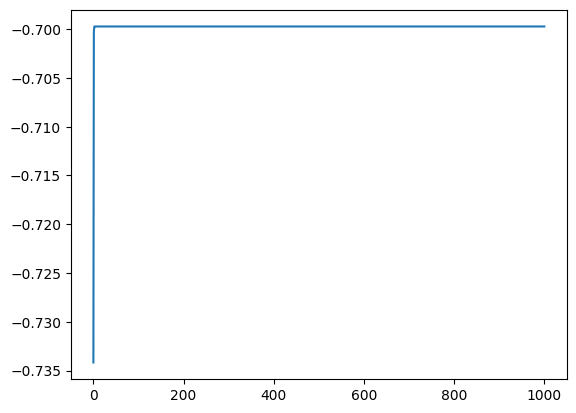

In [165]:
plt.plot(loss) 

## Check for $P \in U(a,b)$

In [157]:
np.sum(P[-1],axis=0) - b

array([-0.0009257 , -0.00064947, -0.00064947, -0.00116773, -0.00217188,
       -0.00171338, -0.00225222, -0.0022188 , -0.00136049, -0.00202517,
       -0.00147648,  0.00037334, -0.00040737,  0.00328207,  0.00434017,
        0.00576306,  0.00670992,  0.00343662,  0.00281179,  0.00404347,
        0.00359004,  0.0021706 , -0.00010174,  0.00021321, -0.00055581,
       -0.00202517, -0.00178495, -0.00221256, -0.00221256, -0.00184428,
       -0.00064947, -0.0009257 , -0.00033876, -0.0009257 , -0.00033876])

In [158]:
np.sum(P[-1],axis=1) - a

array([-0.00147371, -0.00103178, -0.00147371, -0.00274747, -0.00351744,
       -0.00351268, -0.00307235, -0.00189393, -0.00287035, -0.00104913,
       -0.00012367,  0.00436645,  0.0066028 ,  0.01031637,  0.00941084,
        0.00582617,  0.00368341,  0.0055742 ,  0.00261333, -0.00028381,
       -0.00074987, -0.00133957, -0.00316383, -0.00324776, -0.00351744,
       -0.00295535, -0.00103178, -0.00103178, -0.00147371, -0.00103178])

# Log Domain Computation

In [167]:
ee = 0.01
f, g = np.zeros((iteration+1,n)),np.zeros((iteration+1,m))
PP = np.zeros((iteration+1,n,m))
LL = np.zeros(iteration+1)

In [168]:
for i in range(iteration):
    f[i+1] = ee*np.log(a)-ee*np.log(np.dot(K,np.exp(g[i]/ee)))
    g[i+1] = ee*np.log(b)-ee*np.log(np.dot(np.transpose(K),np.exp(f[i+1]/ee)))
    uf,vf = np.exp(f[i+1]/ee), np.exp(g[i+1]/ee)
    PP[i+1] = np.dot(np.diag(uf),K)
    PP[i+1] = np.dot(PP[i+1], np.diag(vf))
    LL[i+1] = Lc(a,b,PP[i+1],ee)

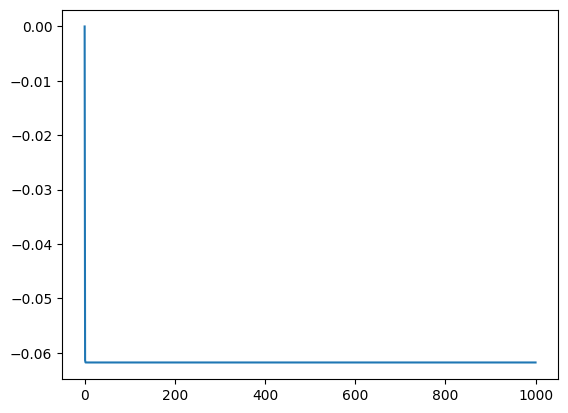

In [169]:
plt.plot(LL) 